Importing Dataset and Informations About It

In [ ]:
#Importing
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/openintro/brfss_2000.csv'
url_content = requests.get(df_url, verify=False).content
cdc = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [ ]:
#column names
cdc.columns.values

array(['exerany', 'hlthplan', 'smoke100', 'height', 'weight', 'wtdesire',
       'age', 'gender', 'genhlth'], dtype=object)

# Task 1: Make a scatterplot of weight versus desired weight. Describe the relationship between these two variables.

task 3: it is quantitive and descrete data. If weight diffrance is 0 it means that the person is at their desired weight. If wdiff is positive it means that person has more weight that their desire and if it is negatie person has less weight than their desired weight.

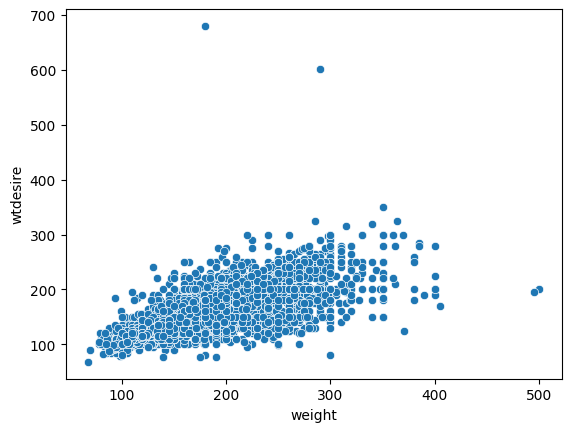

In [ ]:
#scatterplot
sns.scatterplot(x="weight", y="wtdesire", data=cdc)
plt.show();

# Task 2: Let's consider a new variable: the difference between desired weight (wtdesire) and current weight (weight). Create this new variable by subtracting the two columns in the DataFrame and assigning them to a new object called wdiff.

In [ ]:
#creating desired weight diffrance
wdiff = cdc["weight"] - cdc["wtdesire"]

# Adding a new column  from a list
cdc['wdiff'] = wdiff

#other method
#cdc = cdc.add_column("wdiff", wdiff)

# Task 3: What type of data is wdiff? If an observation wdiff is 0, what does this mean about the person's weight and desired weight. What if wdiff is positive or negative?


Answer: it is quantitive and descrete data(also int64). If weight diffrance is 0 it means that the person is at their desired weight. If wdiff is positive it means that person has more weight that their desire and if it is negatie person has less weight than their desired weight.

# Task 4: Describe the distribution of wdiff in terms of its center, shape, and spread, including any plots you use. What does this tell us about how people feel about their current weight?

mean: 14.5891


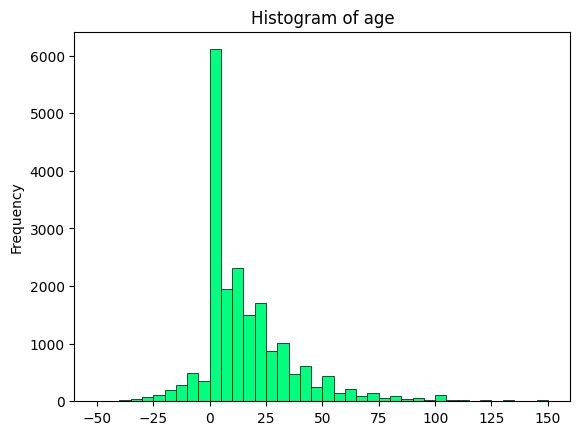

In [ ]:
print("mean:", cdc["wdiff"].mean())

cdc['wdiff'].plot(kind = 'hist', color = 'springgreen', edgecolor = 'black',
                linewidth = 0.5, title = 'Histogram of age', bins = 40, range = (-50, 150))
plt.show();

Answer: Mode is 0-5 and the mean is 14.6. Plot is right skewed. we can see that people generally see them as overweighted even if they see themselves as underweighted the weight difrance is not as much as people who think they are overweighted.

# Task 5: Using numerical summaries and a side-by-side box plot, determine if men tend to view their weight differently than women.

In [ ]:
cdc[cdc['gender'] == 'f']['wdiff'].describe()

,wdiff
count,10431.000000
mean,18.151184
std,23.997133
min,-83.000000
25%,0.000000
50%,10.000000
75%,27.000000
max,300.000000


In [ ]:
cdc[cdc['gender'] == 'm']['wdiff'].describe()

,wdiff
count,9569.000000
mean,10.706134
std,23.492624
min,-500.000000
25%,0.000000
50%,5.000000
75%,20.000000
max,300.000000


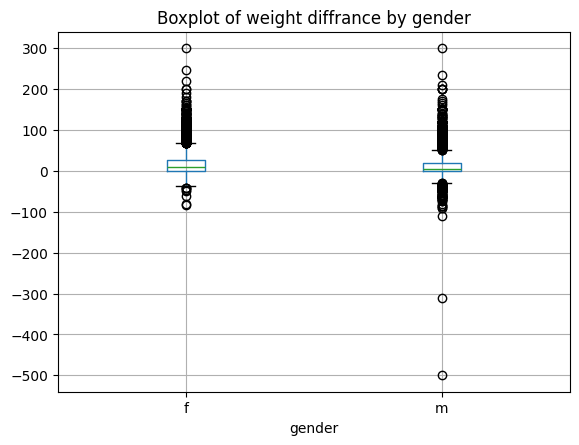

In [ ]:
cdc.boxplot(column = 'wdiff', by = 'gender')
plt.title('Boxplot of weight diffrance by gender')
plt.suptitle('')
plt.show();

Answer:Females have tendency to think they are owerweighted. More man think they are underweighted than women.

# Task 6: Now it's time to get creative. Find the mean and standard deviation of weight and determine what proportion of the weights are within one standard deviation of the mean.

In [ ]:
mean = cdc['weight'].mean()
print(mean)
std = cdc['weight'].std()
print(std)
#point wher standart deviation = 1
z1 = mean + std
print(z1)
#point wher standart deviation = -1
z2 = mean- std
print(z2)

above_z1 = (cdc['weight'] > z1).sum()
print(f"Number of people with weight greater than 1 std: {above_z1}")

above_z2 = (cdc['weight'] > z2).sum()
print(f"Number of people with weight greater than minus 1 std: {above_z2}")

print (f"proportion of the weights within one standard deviation of the mean:{(above_z2 - above_z1)/ len(cdc)}")

169.68295
40.080969967120254
209.76391996712027
129.60198003287974
Number of people with weight greater than 1 std: 3065
Number of people with weight greater than minus 1 std: 17217
proportion of the weights within one standard deviation of the mean:0.7076
